
Taken from: https://riverml.xyz/latest/examples/concept-drift-detection/


In [1]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec


In [2]:
# Generate data for 3 distributions
random_state = np.random.RandomState(seed=42)
dist_a = random_state.normal(0.8, 0.05, 1000)
dist_b = random_state.normal(0.4, 0.02, 1000)
dist_c = random_state.normal(0.6, 0.1, 1000)

# Concatenate data to simulate a data stream with 2 drifts
stream = np.concatenate((dist_a, dist_b, dist_c))

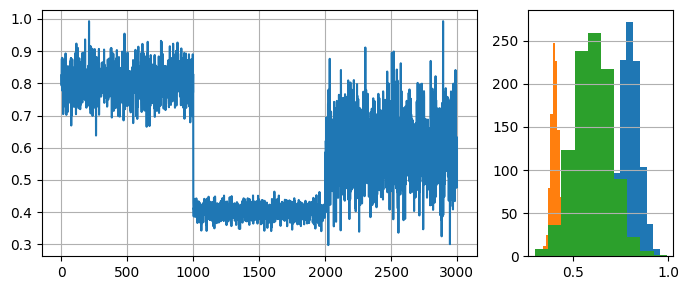

In [3]:


# Auxiliary function to plot the data
def plot_data(dist_a, dist_b, dist_c, drifts=None):
    fig = plt.figure(figsize=(7,3), tight_layout=True)
    gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])
    ax1, ax2 = plt.subplot(gs[0]), plt.subplot(gs[1])
    ax1.grid()
    ax1.plot(stream, label='Stream')
    ax2.grid(axis='y')
    ax2.hist(dist_a, label=r'$dist_a$')
    ax2.hist(dist_b, label=r'$dist_b$')
    ax2.hist(dist_c, label=r'$dist_c$')
    if drifts is not None:
        for drift_detected in drifts:
            ax1.axvline(drift_detected, color='red')
    plt.show()

plot_data(dist_a, dist_b, dist_c)

In [5]:
from river import drift

drift_detector = drift.ADWIN()
drifts = []

for i, val in enumerate(stream):
    drift_detector.update(val)   # Data is processed one sample at a time
    if drift_detector.drift_detected:
        # The drift detector indicates after each sample if there is a drift in the data
        print(f'Change detected at index {i}')
        drifts.append(i)
        # drift_detector.reset()   # As a best practice, we reset the detector

plot_data(dist_a, dist_b, dist_c, drifts)

Change detected at index 1055


AttributeError: 'ADWIN' object has no attribute 'reset'

We conclude this example with some remarks regarding concept drift detectors and their usage:

In practice, drift detectors provide stream learning methods with robustness against concept drift. Drift detectors monitor the model usually through a performance metric.
Drift detectors work on univariate data. This is why they are used to monitor a model's performance and not the data itself. Remember that concept drift is defined as a change in the relationship between data and the target to learn (in supervised learning).
Drift detectors define their expectations regarding input data. It is important to know these expectations to feed a given drift detector with the correct data.